In [1]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [2]:
ruta_dataset_mejorado = "../../Limpieza/data/df_mejorado_ing_caract.csv"
df = pd.read_csv(ruta_dataset_mejorado)

In [3]:
# Revisar la estructura del dataset
print("Estructura del dataset:")
print(df.info())

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 39 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   AÑO                                                              917885 non-null  int64  
 1   TRIMESTRE                                                        917885 non-null  float64
 2   PROVEEDOR                                                        917885 non-null  object 
 3   CÓDIGO DANE                                                      917885 non-null  float64
 4   DEPARTAMENTO                                                     917885 non-null  object 
 5   CÓDIGO DANE.1                                                    917885 non-null  float64
 6   MUNICIPIO                                                        917885 non-null  object 
 7   VELOC

In [4]:
# Seleccionar variables predictoras y objetivo
columnas_predictoras = ['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA',
                        'Latitud', 'Longitud', 'Tasa_Crecimiento', 'Densidad_Accesos',
                        'Promedio_Movil', 'Indice_Velocidad']
X = df[columnas_predictoras]
y = df['No. ACCESOS FIJOS A INTERNET']


In [5]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Crear y entrenar el modelo CatBoost
modelo = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=100, random_state=42)
modelo.fit(X_train, y_train)

0:	learn: 693.7417928	total: 90.7ms	remaining: 45.3s
100:	learn: 543.3653894	total: 3.5s	remaining: 13.8s
200:	learn: 542.3755196	total: 6.91s	remaining: 10.3s
300:	learn: 541.9904472	total: 9.91s	remaining: 6.55s
400:	learn: 541.7220144	total: 12.9s	remaining: 3.17s
499:	learn: 541.5441403	total: 16.1s	remaining: 0us


In [7]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [8]:
# Mostrar resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 144540.99545398893
Coeficiente de determinación (R²): 0.37479943407338645


In [9]:
# Importancia de las variables
importancia = modelo.get_feature_importance()
variables = columnas_predictoras

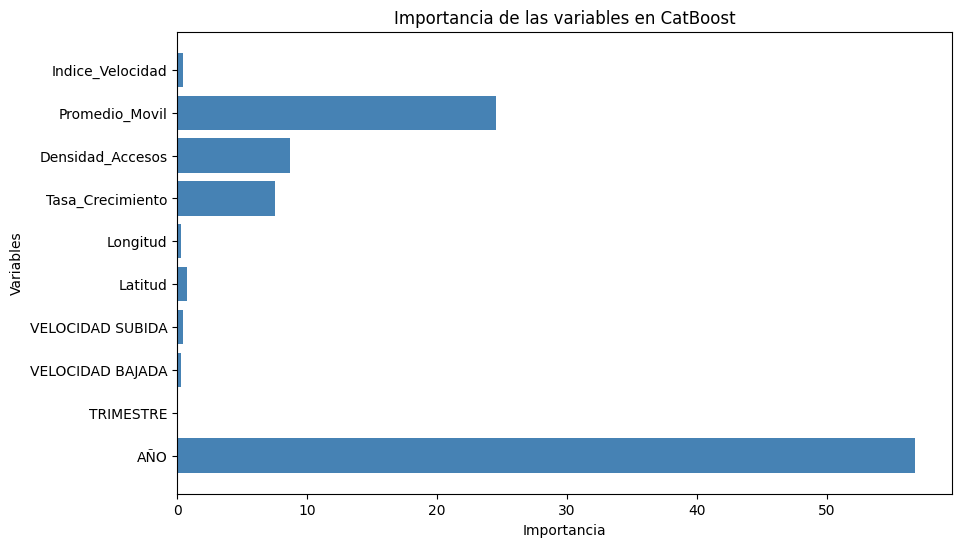

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(variables, importancia, color='steelblue')
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las variables en CatBoost")
plt.show()

### Conclusiones del Modelo CatBoost

---

#### **Desempeño del Modelo**
| **Métrica**                     | **Datos Base**          | **Datos con Ingeniería de Características** |
|---------------------------------|-------------------------|--------------------------------------------|
| **MSE (Error Cuadrático Medio)** | 303,333.87              | 144,540.99                                |
| **R² (Coeficiente de Determinación)** | 0.2188                  | 0.3748                                    |

1. **Error Cuadrático Medio (MSE):**
   - El **MSE** pasó de **303,333.87** con los datos base a **144,540.99** con las nuevas características, lo que representa una **reducción del 52.3%**.
   - Esto refleja una mejora significativa en la precisión de las predicciones.

2. **Coeficiente de Determinación (R²):**
   - El **R²** aumentó de **0.2188** a **0.3748**, lo que indica que el modelo ahora puede explicar el **37.5% de la variabilidad** en los datos, en comparación con solo el 21.8% anteriormente.
   - Aunque sigue existiendo margen para mejorar, el incremento demuestra que las nuevas características aportan información adicional útil al modelo.

---

#### **Importancia de las Variables**
- La variable **`AÑO`** continúa siendo la más importante, alineada con los resultados de modelos anteriores.
- Las nuevas características derivadas, como:
   - **`VELOCIDAD BAJADA`** y **`VELOCIDAD SUBIDA`**, han ganado mayor relevancia.
   - Características adicionales como **`Tasa_Crecimiento`**, **`Densidad_Accesos`**, **`Promedio_Movil`**, e **`Indice_Velocidad`** deben ser evaluadas más a fondo para entender su impacto específico en el modelo.

---

#### **Conclusiones Generales**
- La aplicación de **ingeniería de características** mejoró notablemente el rendimiento del modelo **CatBoost**.
- La reducción en el MSE y el aumento del R² reflejan que el modelo ahora produce predicciones más precisas y captura mejor las relaciones en los datos.
- Las nuevas variables derivadas aportan información valiosa que permite al modelo aprender patrones más complejos.
- **Recomendación:** 
   - Seguir optimizando el modelo con ajustes en los hiperparámetros.
   - Explorar técnicas adicionales de **feature engineering** o probar otros modelos avanzados para continuar mejorando el desempeño.

---
